In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_61080/616645213.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=labels_,fontsize=12, fontname="Arial")
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_61080/616645213.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels=ax1.get_yticklabels(),fontsize=12, fontname="Arial")
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_61080/616645213.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels=labels_,fontsize=12, fontname="Arial")
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_61080/616645213.py:26: UserWarning: set_ticklabels() should only be used with a fixed number 

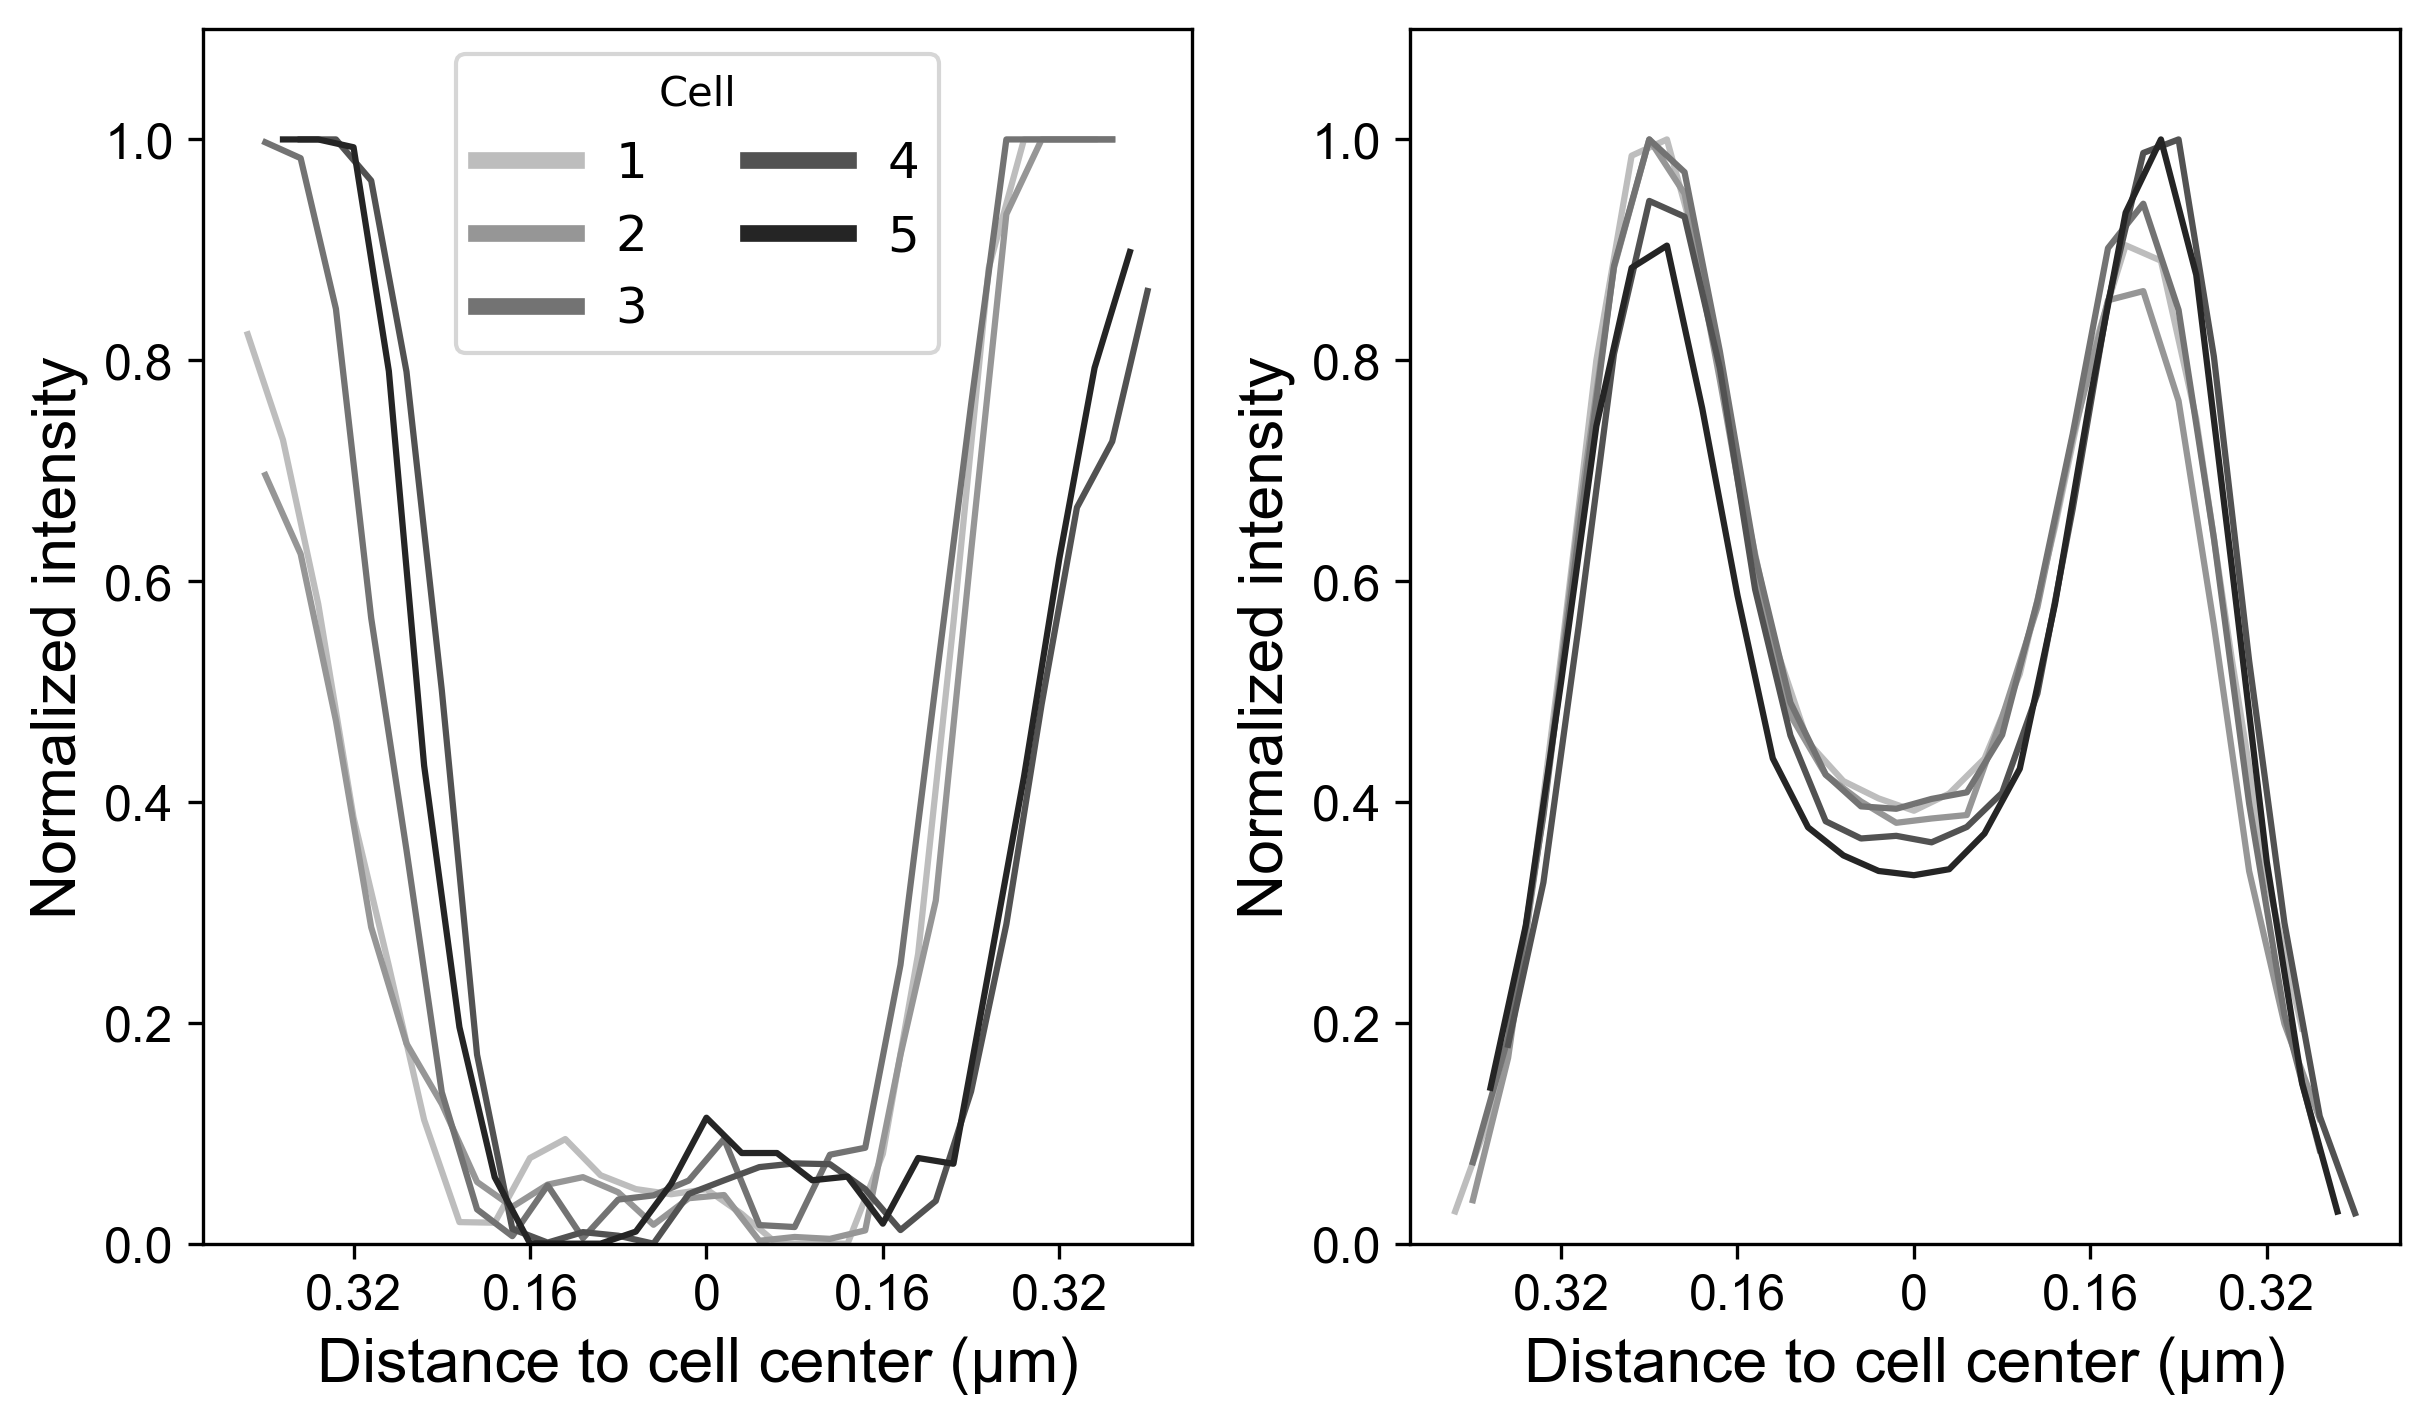

In [2]:
profiles = pd.read_excel('/Users/reyesmatte/Desktop/SingleCells/PHvsFM/Cell_intensity_profiles.xlsx')

centers = [13,12.5,12.5,11.5,12]

colors = ['#bdbdbd','#969696','#737373','#525252','#252525']
custom_lines = [Line2D([0], [0], color=c, lw=4) for c in colors]
labels = [str(i+1) for i in range(5)]
labels_ = [-0.48,0.32,0.16,0,0.16,0.32,0.48]

fig = plt.figure(dpi=300,figsize=(8.2,4.85))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Distance to cell center (µm)',fontsize=15, fontname="Arial")
ax1.set_ylabel('Normalized intensity',fontsize=15, fontname="Arial")
ax1.set_ylim(0,1.1)
#ax1.set_title('F Phase intensity profile',loc='left', fontname="Arial",fontsize=18)
ax1.set_xticklabels(labels=labels_,fontsize=12, fontname="Arial")
ax1.set_yticklabels(labels=ax1.get_yticklabels(),fontsize=12, fontname="Arial")

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Distance to cell center (µm)',fontsize=15, fontname="Arial")
ax2.set_ylabel('Normalized intensity',fontsize=15, fontname="Arial")
ax2.set_ylim(0,1.1)
#ax2.set_title('G FM4-64 intensity profile',loc='left', fontname="Arial",fontsize=18)
ax2.set_xticklabels(labels=labels_,fontsize=12, fontname="Arial")
ax2.set_yticklabels(labels=ax2.get_yticklabels(),fontsize=12, fontname="Arial")

for i in range(5):

    FM = profiles[(profiles['Cell'] == (i+1)) & (profiles['Image'] == 'FM')]
    PH = profiles[(profiles['Cell'] == (i+1)) & (profiles['Image'] == 'Phase')]

    ax2.plot(FM['Position']-centers[i],FM['Intensity']/np.max(FM['Intensity']),color=colors[i])
    ax1.plot(PH['Position']-centers[i],PH['Intensity']/np.max(PH['Intensity']),color=colors[i])

ax1.legend(handles=custom_lines,labels=labels,title='Cell', loc='upper center',ncol=2,fontsize=12)

fig.tight_layout()
fig.savefig('/Users/reyesmatte/profiles.png')